In [20]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import math
import operator
import tensorflow as tf
import random

import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/Users/architaggarwal/Downloads/ELL409/railwayBookingList.csv')
df = df.sample(frac=1).reset_index(drop=True)
print(df)
category = pd.get_dummies(df['preferredClass'])
category_sex = pd.get_dummies(df['sex'])
category_age = pd.get_dummies(df['age'])
df.drop(["preferredClass", 'sex', 'age'], axis = 1, inplace = True)
category.drop(['NO_PREF'], axis = 1, inplace = True)
# category_sex.drop(['NO_PREF'], axis = 1, inplace = True)
df = pd.concat([df, category, category_sex, category_age], axis=1)
df.columns = df.columns.astype(str)
print(df)
print(category)
print(category_sex)
print(category_age)

          caseID  boarded  budget  memberCount preferredClass     sex  age
0     2220118861        0     781            0      SECOND_AC  female    1
1      902182135        0     710            0       THIRD_AC    male    2
2     1191087703        0     710            1       THIRD_AC    male    2
3     3264851666        1     781            0      SECOND_AC    male    4
4     3092991901        0     852            3      SECOND_AC  female    2
5     2216384925        1     710            2       THIRD_AC    male    1
6     2835020383        0    1633            0       FIRST_AC  female    4
7     2832258310        1     781            0      SECOND_AC    male    2
8       81244516        0    2556            4       FIRST_AC    male    1
9     2535965118        1     710            0       THIRD_AC    male    0
10    3910378414        1     781            0      SECOND_AC    male    2
11     420123847        0    1349            1       FIRST_AC    male    2
12    3496314300        0

In [7]:
x = df.loc[:,"budget":"8"]
y = df.loc[:,"boarded"]
x = x.values
y = y.values
print(x.shape, y.shape)
count_class = np.bincount(y)
print(count_class)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
count_class = np.bincount(y_train)
print(count_class)

((1310, 16), (1310,))
[500 810]
[350 567]


In [8]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

('x_train shape:', (917, 16), 'y_train shape:', (917,))


In [9]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

('x_test shape:', (393, 16), 'y_test shape:', (393,))


In [10]:
x_train_final = x_train[:,0:2]
print(x_train_final)
max_across_columns = np.max(x_train_final,axis=0)
print(max_across_columns)
x_train_final = x_train_final.astype('float32') / max_across_columns
print(x_train_final)

[[ 852    0]
 [ 923    4]
 [1136   10]
 ..., 
 [ 710    0]
 [ 781    0]
 [1846    2]]
[4331   10]
[[ 0.19672131  0.        ]
 [ 0.21311475  0.4       ]
 [ 0.26229508  1.        ]
 ..., 
 [ 0.16393443  0.        ]
 [ 0.18032787  0.        ]
 [ 0.42622951  0.2       ]]


In [11]:
x_train_final = np.column_stack((x_train_final, x_train[:,2:16]))
x_train_final

array([[ 0.19672131,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.21311475,  0.4       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26229508,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.16393443,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18032787,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.42622951,  0.2       ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [12]:
x_train = x_train_final

In [13]:
x_test_final = x_test[:,0:2]
print(x_test_final)
# max_across_columns = np.max(x_train_final,axis=0)
# print(max_across_columns)
x_test_final = x_test_final.astype('float32') / max_across_columns
print(x_test_final)

[[ 781    1]
 [ 781    1]
 [ 781    2]
 [ 710    0]
 [ 710    0]
 [1349    1]
 [ 710    0]
 [ 710    0]
 [ 710    0]
 [1349    1]
 [ 852    0]
 [ 852    2]
 [ 923    0]
 [1065    1]
 [ 710    0]
 [ 710    0]
 [1207    2]
 [ 710    0]
 [ 710    0]
 [ 781    2]
 [ 710    0]
 [1065    1]
 [ 710    0]
 [ 710    0]
 [1065    1]
 [ 781    1]
 [ 710    0]
 [ 710    0]
 [ 710    0]
 [1278    2]
 [ 852    2]
 [ 710    0]
 [ 710    0]
 [ 781    0]
 [ 710    0]
 [1065    0]
 [ 710    0]
 [ 923    1]
 [ 781    0]
 [ 781    0]
 [ 710    0]
 [ 781    0]
 [ 923    1]
 [1065    1]
 [ 710    0]
 [ 923    6]
 [ 781    0]
 [ 852    2]
 [ 852    2]
 [ 710    0]
 [ 852    0]
 [ 710    0]
 [ 710    0]
 [2414    1]
 [ 923    1]
 [ 710    0]
 [ 994    7]
 [1278    1]
 [ 710    0]
 [ 781    0]
 [ 923    2]
 [ 781    0]
 [ 852    0]
 [ 852    4]
 [ 710    0]
 [2272    1]
 [ 781    0]
 [1207    0]
 [1491    2]
 [ 781    0]
 [ 710    0]
 [ 923    1]
 [ 710    0]
 [2272    0]
 [1207    1]
 [ 710    0]
 [ 710    0]

In [14]:
x_test_final = np.column_stack((x_test_final, x_test[:,2:16]))
x_test_final

array([[ 0.18032787,  0.1       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18032787,  0.1       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18032787,  0.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.16393443,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18032787,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16393443,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [15]:
x_test = x_test_final

In [16]:
# PCA with in-built library
# define a matrix
A = x_train
B = x_test
print(A)
# create the PCA instance
pca = PCA(0.98)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
C = pca.transform(A)
D = pca.transform(B)
print(C)
print(D)
x_train_final = C
x_test_final = D

[[ 0.19672131  0.          1.         ...,  0.          0.          0.        ]
 [ 0.21311475  0.4         0.         ...,  0.          0.          0.        ]
 [ 0.26229508  1.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.16393443  0.          0.         ...,  0.          0.          0.        ]
 [ 0.18032787  0.          0.         ...,  0.          0.          0.        ]
 [ 0.42622951  0.2         1.         ...,  0.          0.          0.        ]]
[[  4.53087479e-02   2.36653928e-02   2.61021228e-01   1.37296705e-01
   -3.98765038e-01   5.99999650e-01  -6.00446756e-01  -1.35914999e-01
    2.55506935e-02  -5.88878948e-02   5.99658704e-02   4.77474935e-02
    4.68603362e-02   1.37536359e-02   9.29974805e-04  -5.11024782e-06]
 [ -3.58446215e-02   5.26562316e-02  -2.98269248e-01  -3.19463012e-01
    6.17098797e-01   3.55942182e-01  -3.56575645e-01   3.59665175e-01
    4.29395169e-02  -7.64224735e-02  -1.42956808e-01  -8.96968397e-02
   -6.51726475e-02  -

In [17]:
print(x_train_final.shape)
print(x_test_final.shape)

(917, 9)
(393, 9)


In [18]:
pca.n_components_

9

In [21]:
model = GaussianNB()
model.fit(x_train_final, y_train)
predicted = model.predict(x_test_final)
print(predicted)
print(y_test)

[1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1
 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1
 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1]
[1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1

In [22]:
count = 0
for i in range(x_test_final.shape[0]):
    if predicted[i] == y_test[i]:
        count = count + 1
print(count)

304


(1, '/n', array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
  

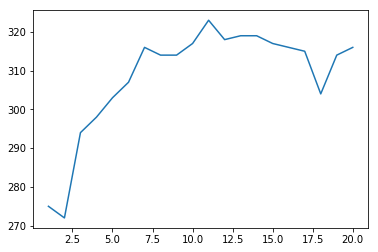

In [24]:
#K Nearest Neighbors
from __future__ import division
store_x = range(1, 21)
store_y = [0]*20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_final, y_train)
    prediction_list = knn.predict(x_test_final)
    print(k, '/n', prediction_list)
    count = 0
    for i in range(len(prediction_list)):
        if y_test[i] == prediction_list[i]:
            count += 1
    print(count)
    store_y[k-1] = count
plt.plot(store_x, store_y)
plt.show()